In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Metadata:

# "timestamp" - timestamp field for grouping the data
# "cnt" - the count of a new bike shares
# "t1" - real temperature in C
# "t2" - temperature in C "feels like"
# "hum" - humidity in percentage
# "wind_speed" - wind speed in km/h
# "weather_code" - category of the weather
# "is_holiday" - boolean field - 1 holiday / 0 non holiday
# "is_weekend" - boolean field - 1 if the day is weekend
# "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

# "weathe_code" category description:
# 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
# 2 = scattered clouds / few clouds
# 3 = Broken clouds 
# 4 = Cloudy 
# 7 = Rain/ light Rain shower/ Light rain 
# 10 = rain with thunderstorm
# 26 = snowfall 94 = Freezing Fog

In [3]:
bikes = pd.read_csv("london_merged.csv")
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
bikes

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [5]:
bikes.shape

(17414, 10)

In [6]:
bikes.weather_code.value_counts() #bikes["weather_code"].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [7]:
bikes["season"].value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [8]:
new_cols_dict={
    "timestamp":"time",
    "cnt":"count",
    "t1":"temp_real_c",
    "t2":"temp_feels_like_c",
    "hum":"humidity_percent",
    "wind_speed":"wind_speed_kph",
    "weather_code":"weather",
    "is_holiday":"is_holiday",
    "is_weekend":"is_weekend",
    "season":"season"
      
}
bikes.rename(new_cols_dict,axis = 1,inplace = True)

In [9]:
bikes

,time,count,temp_real_c,temp_feels_like_c,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [10]:
bikes["humidity_percent"] = bikes["humidity_percent"]/100
bikes

,time,count,temp_real_c,temp_feels_like_c,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,0.760,23.0,4.0,0.0,0.0,3.0


In [11]:
season_dict = {
    0: "spring",
    1: "summer",
    2: "autumn",
    3: "winter"
}



In [12]:
bikes["season"] = bikes["season"].astype(int).map(season_dict)
bikes

,time,count,temp_real_c,temp_feels_like_c,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,3.0,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,1.0,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,1.0,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,1.0,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,1.0,0.0,1.0,winter
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,3.0,0.0,0.0,winter
17410,2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,4.0,0.0,0.0,winter
17411,2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,4.0,0.0,0.0,winter
17412,2017-01-03 22:00:00,224,5.5,1.5,0.760,23.0,4.0,0.0,0.0,winter


In [13]:
weather_dict = {
    1:"clear",
    2:"scattered clouds",
    3:"broken clouds",
    4:"cloudy",
    7:"rian",
    10:"rain with thunderstorm",
    23:"snowfall"
    
}

In [14]:
bikes["weather"] = bikes["weather"].astype(int).map(weather_dict)
bikes

,time,count,temp_real_c,temp_feels_like_c,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,clear,0.0,1.0,winter
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,broken clouds,0.0,0.0,winter
17410,2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,cloudy,0.0,0.0,winter
17411,2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,cloudy,0.0,0.0,winter
17412,2017-01-03 22:00:00,224,5.5,1.5,0.760,23.0,cloudy,0.0,0.0,winter


In [15]:
bikes.to_excel("london_bikes_ride.xlsx" ,sheet_name = "data")

In [16]:
bikes["time"] = pd.to_datetime(bikes["time"], errors='coerce')

In [17]:
# split timestamp into hour and date
bikes['date'] = bikes['time'].apply(lambda x: x.date())
bikes['dayofweek'] = bikes['time'].apply(lambda x: x.dayofweek)
bikes['hour'] = bikes['time'].apply(lambda x: x.hour)
bikes['month'] = bikes['time'].apply(lambda x: x.month)
bikes

,time,count,temp_real_c,temp_feels_like_c,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,date,dayofweek,hour,month
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,broken clouds,0.0,1.0,winter,2015-01-04,6,0,1
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,clear,0.0,1.0,winter,2015-01-04,6,1,1
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,clear,0.0,1.0,winter,2015-01-04,6,2,1
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,clear,0.0,1.0,winter,2015-01-04,6,3,1
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,clear,0.0,1.0,winter,2015-01-04,6,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,broken clouds,0.0,0.0,winter,2017-01-03,1,19,1
17410,2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,cloudy,0.0,0.0,winter,2017-01-03,1,20,1
17411,2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,cloudy,0.0,0.0,winter,2017-01-03,1,21,1
17412,2017-01-03 22:00:00,224,5.5,1.5,0.760,23.0,cloudy,0.0,0.0,winter,2017-01-03,1,22,1


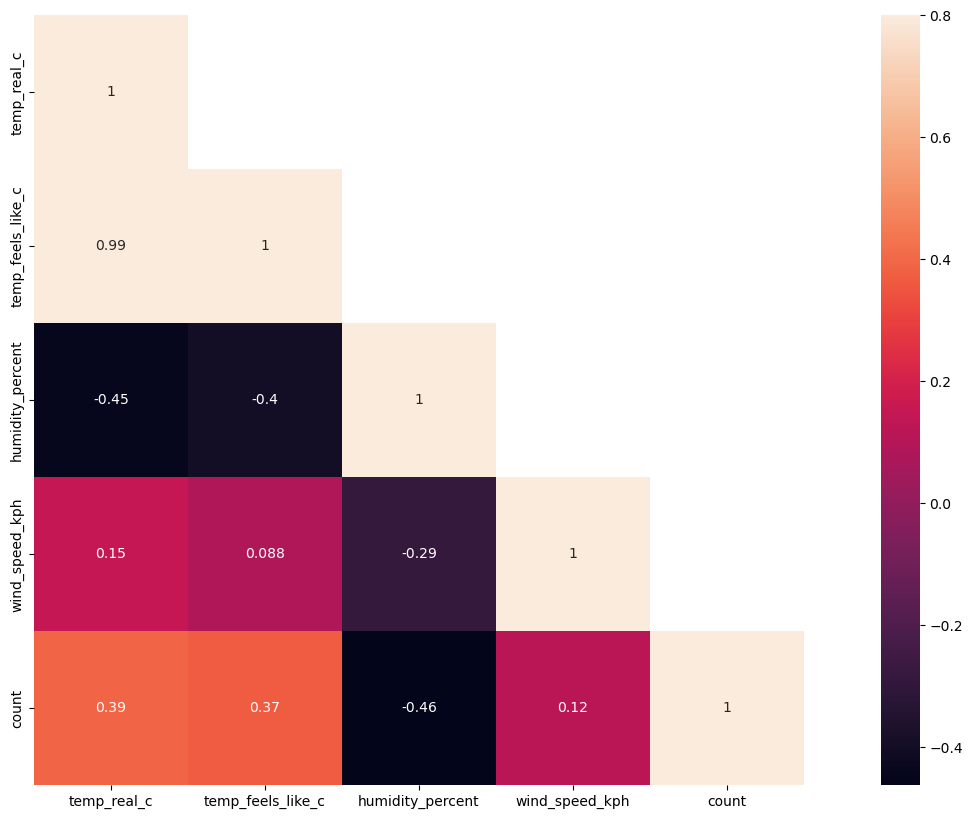

In [18]:
correlation = bikes[["temp_real_c","temp_feels_like_c","humidity_percent","wind_speed_kph","count"]].corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(correlation, mask=mask,vmax=.8, square=True,annot=True)

plt.show()

In [19]:
# insight
#  temp is positively correlated with Count（0.39）
#  Count is negatively correlated with humidity; excessively high humidity is not conducive to cycling（-0.46）.
#  it seems that windspeed has little influence on the number of rentals（0.12）.

  humidity_band        temp_band  count  holiday_map
0  (0.841, 1.0]  (-1.536, 4.417]    182  non-holiday
1  (0.841, 1.0]  (-1.536, 4.417]    138  non-holiday
2  (0.841, 1.0]  (-1.536, 4.417]    134  non-holiday
3  (0.841, 1.0]  (-1.536, 4.417]     72  non-holiday
4  (0.841, 1.0]  (-1.536, 4.417]     47  non-holiday


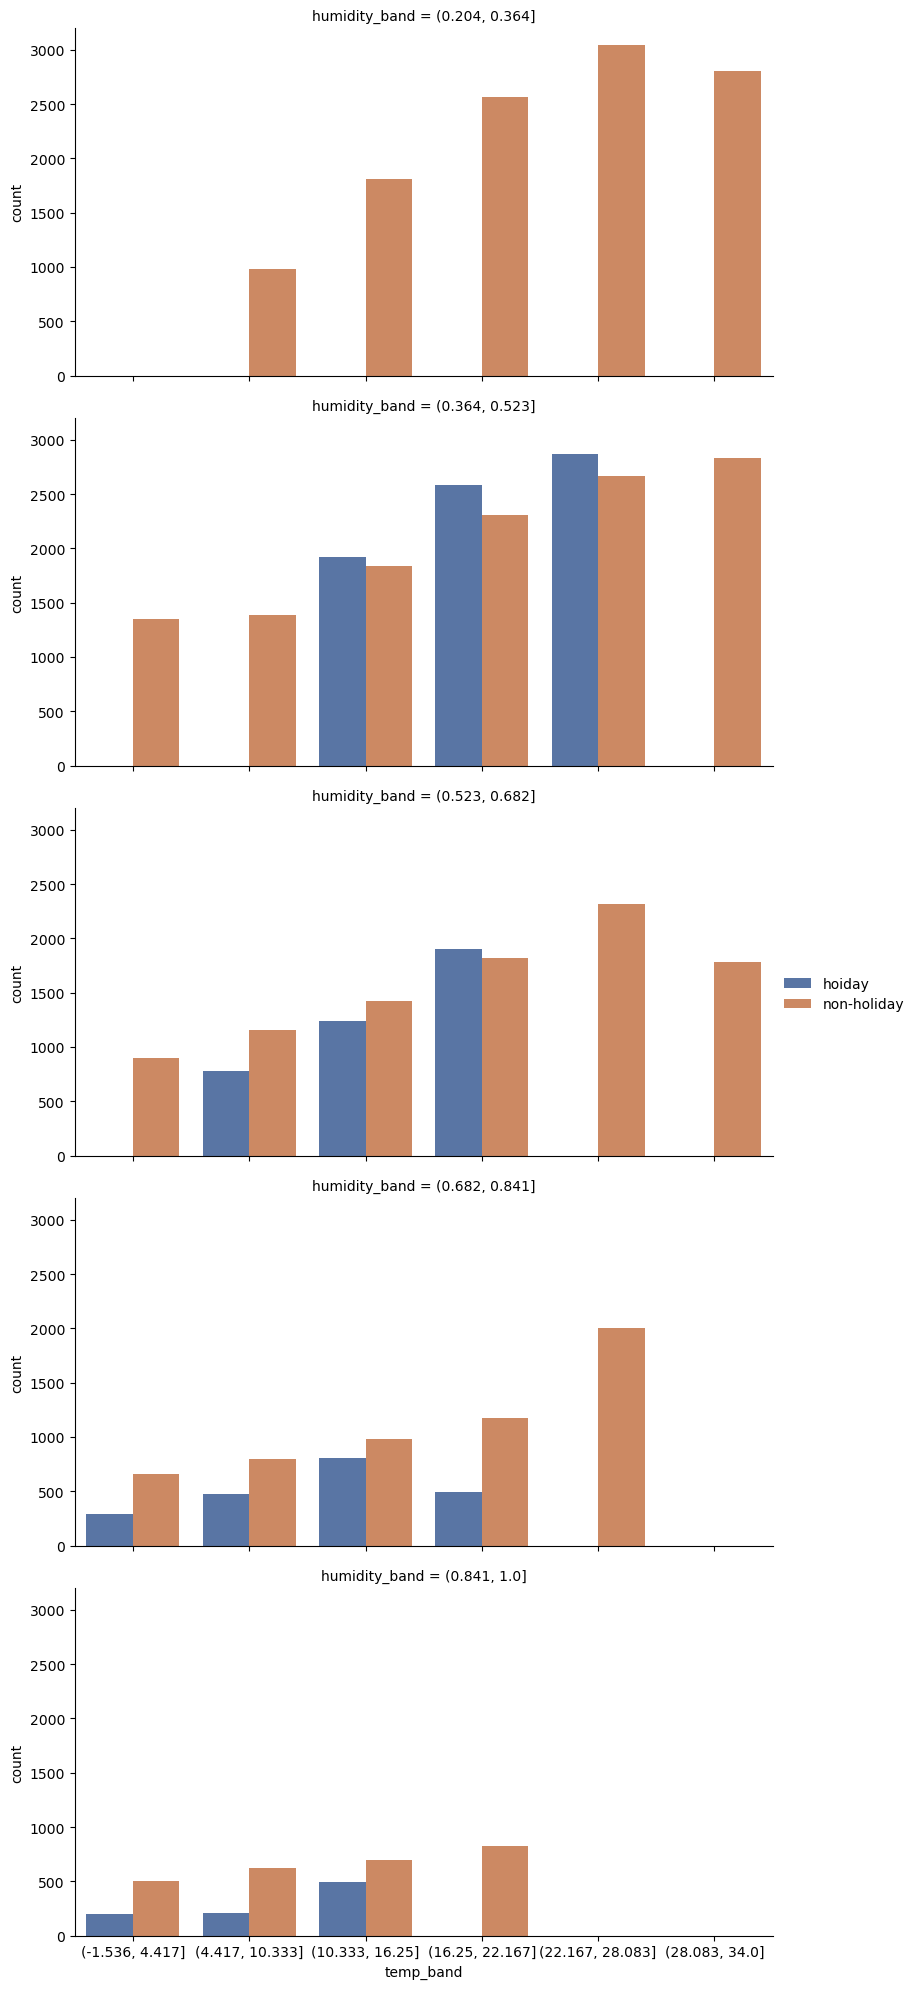

In [20]:
#温度和湿度离散化
bikes["humidity_band"] = pd.cut(bikes['humidity_percent'],5)
bikes["temp_band"] = pd.cut(bikes["temp_real_c"],6)

#假期字段映射处理
bikes["holiday_map"] = bikes["is_holiday"].map({0:"non-holiday",1:"hoiday"})

# sns.FacetGrid(data=bikes,row="humidity_band",height=4,aspect=2).\
# map(sns.barplot,'temp_band','count','holiday_map',palette='deep',errorbar=None, order =['temp_band','count','holiday_map']).\
# add_legend()

# plt.show()

print(bikes[['humidity_band', 'temp_band', 'count', 'holiday_map']].head())

# 绘制图表
sns.FacetGrid(data=bikes, row="humidity_band", height=4, aspect=2).\
    map(sns.barplot, 'temp_band', 'count', 'holiday_map', palette='deep', errorbar=None, order=bikes['temp_band'].unique(), hue_order=["hoiday", "non-holiday"]).\
    add_legend()
plt.show()

In [ ]:


# The number of rentals is higher when humidity is between 0 and 0.6, and the temperature is between 20 and 40.

# Normally, the number of cyclists is higher on non-holidays compared to holidays.


In [ ]:

fig, axes = plt.subplots(figsize=(10,5))
sns.pointplot(data=bikes, 
              x='hour', y='count', hue='season',
              ax = axes,errorbar=None)
axes.set(title="Seasonal demand for bikes");

In [ ]:
# As we can see above bike share demand is highest around rush hour 7 to 9 am and 5 to 7pm.
#Also bike demand is highest around the summer. Bike demand is lowest in the winter.

In [ ]:

fig, axes = plt.subplots(figsize=(10,5))
sns.pointplot(data=bikes, x='month', y='count', hue='weather', ax=axes,errorbar = None)
axes.set_title("Weather demand for bikes")
plt.legend(loc='upper right')



In [ ]:
# Overall, the better the weather, the more rentals there are.

# The number of rentals is higher from May to October. 
# From January to May, there is a general upward trend, 
# followed by a noticeable decline after October

In [ ]:
sns.barplot(bikes,x='dayofweek',y="count",errorbar=None)

In [ ]:
# As we can see above bike share demand is highest around Monday - Friday(0-4).

In [ ]:
plt.figure(figsize=(10, 6))
axes = sns.barplot(x=bikes.time.dt.year, y='count',hue='season',data=bikes,errorbar=None)
axes.set_title("comparison between seasons")
axes.set_xlabel("year")
axes.set_ylabel('count')
plt.show()

In [ ]:
#bike demand is highest around the summer. Bike demand is lowest in the winter.

In [ ]:
fig,axes = plt.subplots(figsize=(10, 5))
sns.barplot(data=bikes, x="month",y="count",errorbar=None)
axes.set(title="Monthly distribution of bike demand");

In [ ]:
# Demand is highest around the summer months same as the seasonality chart from above.

In [ ]:

plt.figure(figsize=(10, 6))

sns.pointplot(data=bikes,x="hour", y="count", hue ="dayofweek",errorbar= None)

plt.show()

In [ ]:
# On Saturdays and Sundays, the peak hours for rentals are in the afternoon.

# During weekdays, the peak rental times are during the morning and evening rush hours.